# Spotify Data Exploration: the Popularity Feature

## Intro:

After retrieving some data from the Spotify API (for more info about that check out [this notebook](https://github.com/tgel0/spotify-data/blob/master/notebooks/SpotifyDataRetrieval.ipynb)) it's time to get some insights. In this notebook, I will use data collected during the months of August and September 2018 to identify the most popular tracks and artists on Spotify using the 'popularity' featue.

## About the Popularity Feature:

From the [official Spotify docs](https://developer.spotify.com/documentation/web-api/reference/search/search/): 
>"The popularity of the track. The value will be between 0, for least popular, and 100 for most popular. 
The popularity of a track is a value between 0 and 100, with 100 being the most popular. Popularity is based mainly on the total number of playbacks. Duplicate tracks, such as both in a single and in an album, are popularity rated differently. 
Note: This value is not updated in real-time and may therefore lag behind in actual popularity."

## Goal of this Notebook:

The goal is to use the previously retrieved data to gain insights from the popularity feature such as most popular tracks and most popular artists by analyzing and visualizing the data using Python libraries Pandas, Numpy and Matplotlib.

In [1]:
# import libraries
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# get all csv files into one variable
path = 'Datasets/Summer2018'
all_files = glob.glob(os.path.join(path, "*.csv"))

# create lists of columns to be used when reading/merging the csv's
columns = ['artist_name','track_id', 'track_name', 'popularity']
merge_columns = ['artist_name','track_id', 'track_name']

# create dataframes by reading the csv's in all_files
df_from_each_file = (pd.read_csv(f, usecols=columns) for f in all_files)

# create empty dataframe with the defined column structure
df = pd.DataFrame(columns=columns)

# loop over dataframes and merge into one dataframe
# outer join in order to keep the popularity column from each file
for df_, files in zip(df_from_each_file, all_files): # all_files are here to provide the column suffix (0920,0830 etc)
    df = df.merge(df_, how='outer', on=merge_columns, suffixes=('',str(files)[-8:-4]))

print('Shape: ', df.shape)
df.head()

Shape:  (13257, 7)


,popularity,artist_name,popularity0920,track_id,track_name,popularity0830,popularity0807
0,NaN,Travis Scott,96.0,2xLMifQCjDGFmkHkpNLD9h,SICKO MODE,94.0,86.0
1,NaN,6ix9ine,96.0,2E124GmJRnBJuXbTb4cPUB,FEFE (feat. Nicki Minaj & Murda Beatz),95.0,94.0
2,NaN,Juice WRLD,96.0,0s3nnoMeVWz3989MkNQiRf,Lucid Dreams,95.0,95.0
3,NaN,Drake,100.0,2G7V7zsVDxg1yRsu7Ew9RJ,In My Feelings,100.0,100.0
4,NaN,XXXTENTACION,95.0,3ee8Jmje8o58CHK66QrVC2,SAD!,95.0,98.0


Since I have merged 3 files based on artist and track names there shouldn't be a lot duplicates.

However, it is still worth to do a quick drop_duplicates here.

In [2]:
# drop duplicate tracks
df.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
print('Shape after dropping: ', df.shape)

Shape after dropping:  (12933, 7)


# 1. Top 50 most Popular Tracks

In [3]:
# sum individual popularity scores
df['popularity'] = df[['popularity0920', 'popularity0830', 'popularity0807']].sum(axis=1)

# calculate also the mean popularity score
df['popularity_mean'] = df[['popularity0920', 'popularity0830', 'popularity0807']].mean(axis=1)

# create new dataframe df_top ordered consisting of the 100 most popular tracks
df_top = df.sort_values('popularity', ascending=False).head(100)

# show the first 50 results
df_top[['artist_name', 'track_name', 'popularity', 'popularity_mean']].head(50)

,artist_name,track_name,popularity,popularity_mean
3,Drake,In My Feelings,300.0,100.000000
4,XXXTENTACION,SAD!,288.0,96.000000
12,Cardi B,I Like It,288.0,96.000000
6,Tyga,Taste (feat. Offset),287.0,95.666667
10,Post Malone,Better Now,287.0,95.666667
80,Clean Bandit,Solo (feat. Demi Lovato),287.0,95.666667
2,Juice WRLD,Lucid Dreams,286.0,95.333333
72,Calvin Harris,One Kiss (with Dua Lipa),285.0,95.000000
1,6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),285.0,95.000000
9,benny blanco,Eastside (with Halsey & Khalid),284.0,94.666667


# 2. Top Artists by Popularity

Note: the Spotify API offers a special popularity score on artist-level as well. That score is not used here.

Instead, I have used only the popularity scores of their individual tracks.

In [4]:
# show top 20 artists by number of tracks in top 100
df_top[['artist_name','track_name']].groupby('artist_name').count().sort_values('track_name', ascending=False).head(20)

,track_name
artist_name,
Drake,5
XXXTENTACION,5
Travis Scott,5
Post Malone,5
Juice WRLD,3
Khalid,2
David Guetta,2
Daddy Yankee,2
Ozuna,2


In [5]:
# show top 20 artists by total popularity of their tracks in top 100
df_top[['artist_name','popularity']].groupby('artist_name').sum().sort_values('popularity', ascending=False).head(20)

,popularity
artist_name,
Drake,1364.0
XXXTENTACION,1362.0
Post Malone,1343.0
Travis Scott,1303.0
Juice WRLD,797.0
Tyga,544.0
Nicky Jam,537.0
Ozuna,535.0
Zedd,535.0


# 4. Visualizing Popularity

For this visualization I borrowed the code from another project of mine - [Twitter 10k (plot number 5)](https://github.com/tgel0/twitter-10k/blob/master/Twitter10k.ipynb).

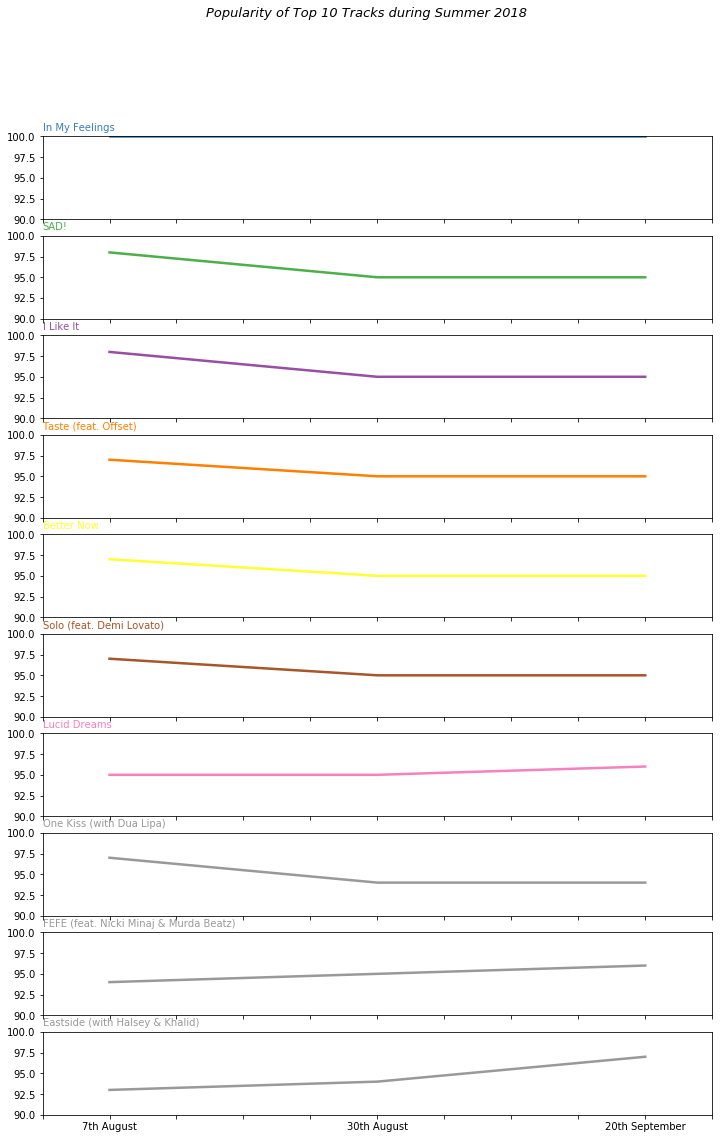

In [6]:
# create a new transposed dataframe where the track names are the columns and individual popularities the rows
df_top10_pop = df_top[['track_name','popularity0807','popularity0830','popularity0920']].set_index('track_name').head(10).T

# set the figure size
plt.figure(figsize=(12,18))
 
# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot of the top10 track popularities
num=0
for track in df_top10_pop.columns:
    num+=1
 
    # find the right spot on the plot
    plt.subplot(10,1, num)
    
    # plot the individual popularities
    df_top10_pop.loc[['popularity0807', 'popularity0830', 'popularity0920'],track].plot(marker='', color=palette(num), linewidth=2.5)
    
    # same limits for every subplot
    plt.ylim(90,100)
    
    # get current position of the ticks
    locs, labels = plt.xticks()

    # add ticks with custom labels
    mylabels = ['','7th August', '','', '','30th August', '','','', '20th September'] # a bit ugly but it works
    plt.xticks(locs, mylabels)

    # not ticks everywhere
    if num in range(10) :
        plt.tick_params(labelbottom=False)
        
    # add title
    plt.title(track, loc='left', fontsize=10, fontweight=0, color=palette(num))
    
# add general title
plt.suptitle("Popularity of Top 10 Tracks during Summer 2018", fontsize=13, fontweight=0, color='black', style='italic');